***Дана статистика пользователей adult.csv.
Получите значения AUC для различных моделей и их параметров. Попробуйте построить модель с улучшенным значением AUC, чем в примерах на занятии.***

In [6]:
import pandas as pd
import numpy as np

In [8]:
data  = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
#выбираем признаки, по которым будем предугадывать заработок
selectedColumns = data [ ['age', 'workclass', 'education',  'educational-num', 
                          'marital-status',  'relationship', 'race', 'occupation',
                          'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
                          'native-country', 'income'] ]

In [11]:
# преобразуем столбец с наименованиями в матрицу, которая будет состоять из значений
X = pd.get_dummies( selectedColumns, columns = [ 'workclass', 'education', 'marital-status', 'occupation',
                                                'relationship','race',  'gender', 'native-country'])

# удаляем из матрицы Х интересующий нас столбец с доходами "income"
del X['income']
X.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,10,0,0,30,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
# номализуем данные
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

C:\Users\89517_000\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\89517_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995129,-1.197259,-0.144804,-0.217127,-0.034087,-0.246558,-0.173795,-0.261940,-0.01431,0.663711,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705
1,-0.046942,-0.419335,-0.144804,-0.217127,0.772930,-0.246558,-0.173795,-0.261940,-0.01431,0.663711,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705
2,-0.776316,0.747550,-0.144804,-0.217127,-0.034087,-0.246558,-0.173795,3.817672,-0.01431,-1.506680,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705
3,0.390683,-0.030373,0.886874,-0.217127,-0.034087,-0.246558,-0.173795,-0.261940,-0.01431,0.663711,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705
4,-1.505691,-0.030373,-0.144804,-0.217127,-0.841104,4.055836,-0.173795,-0.261940,-0.01431,-1.506680,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705


### Переведем столбец с доходами с числовые значения


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()
le.fit (data ['income'])

LabelEncoder()

In [16]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [17]:
# трансформируем столбец с доходами
y = pd.Series (data = le.transform (data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

### Найдем найлучший параметр для дерева решений. Перед этим разобьем данные на трейновую и тестовую части

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.2,random_state=0)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
params = [ {'max_depth': list( range(1, 20) )} ]

In [21]:
gs = GridSearchCV( DecisionTreeClassifier(), param_grid = params, cv=5, scoring = 'accuracy', return_train_score = False )

In [29]:
gs.fit( X_train, y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [30]:
gs.best_params_

{'max_depth': 11}

In [31]:
gs.score( X_test, y_test)

0.8570989865902344

Но на самом деле большая глубина для дерева решениий может переобучить модель. Попробуем для данного решения построить ROC AUC кривые и получить из значения.

In [34]:
import matplotlib.pyplot as plt

#### Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики precision (точность) и recall (полнота).

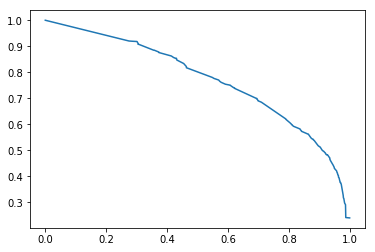

In [36]:
from sklearn.metrics import precision_recall_curve
pr,rec,thresh = precision_recall_curve(y_test,gs.predict_proba(X_test)[:,1])

plt.plot(rec,pr)

In [39]:
# площадь под графиком, которая характеризует точность предсказаний
from sklearn.metrics import average_precision_score
average_precision_score(y_test,gs.predict_proba(X_test)[:,1])

0.7534940313121693

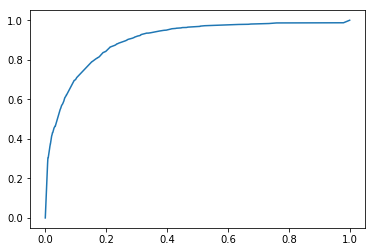

In [41]:
from sklearn.metrics import roc_curve
tpr,fpr,thresh = roc_curve(y_test,gs.predict_proba(X_test)[:,1])
plt.plot(tpr, fpr)

In [43]:
# так же и для этой кривой посчитаем метрику
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,gs.predict_proba(X_test)[:,1])

0.8993891132201692

### Построим еще одну модель используя логистическую регрессию

In [45]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, y_train )
y_pred = model.predict_proba( X_test )

C:\Users\89517_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
cs = 10**np.linspace(-3,1,5)
grid = {'C': cs}
gridsearch = GridSearchCV(LogisticRegression(penalty = 'l1'), grid, scoring='accuracy', cv=5)

In [52]:
gridsearch.fit( X_train, y_train )

C:\Users\89517_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\89517_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\89517_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\89517_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\89517_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [53]:
gridsearch.best_params_

{'C': 0.1}

In [55]:
average_precision_score(y_test,gridsearch.predict_proba(X_test)[:,1])

0.7584268734865356

In [58]:
roc_auc_score(y_test,gridsearch.predict_proba(X_test)[:,1])

0.9032745768974353

Вывод: для данной задачи лучше оказалась логистическая регрессия, если оценивать с точки зрения данных полученнных от значениий AUC.